<a href="https://colab.research.google.com/github/hufsaim/T10306201/blob/master/notebook_2023/Lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Image Restoration

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f = plt.imread('test-pattern.tif')
f.shape

(604, 604)

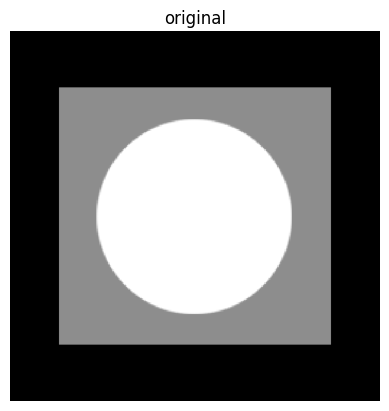

In [3]:
plt.imshow(f, cmap='gray', aspect = 'equal')
plt.axis('off')
plt.title('original')
plt.show()

### Gaussian Noise

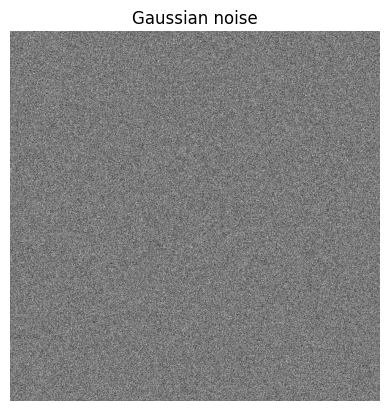

In [4]:
n_gauss = np.random.normal(0,16,f.shape)
plt.imshow(n_gauss, cmap='gray', aspect = 'equal')
plt.axis('off')
plt.title('Gaussian noise')
plt.show()

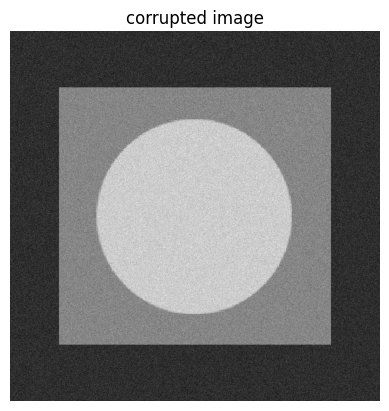

In [5]:
f_n = f + n_gauss
plt.imshow(f_n,cmap='gray',aspect='equal')
plt.axis('off')
plt.title('corrupted image')
plt.show()

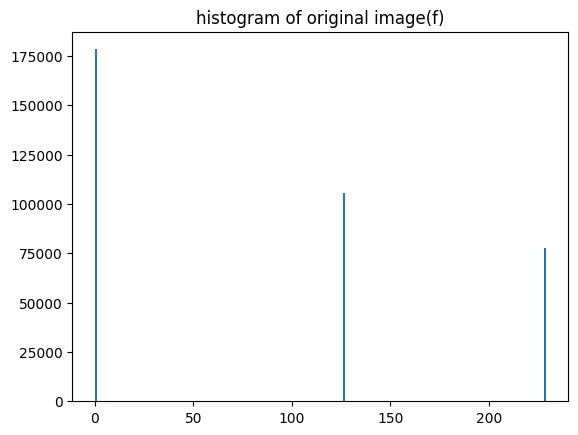

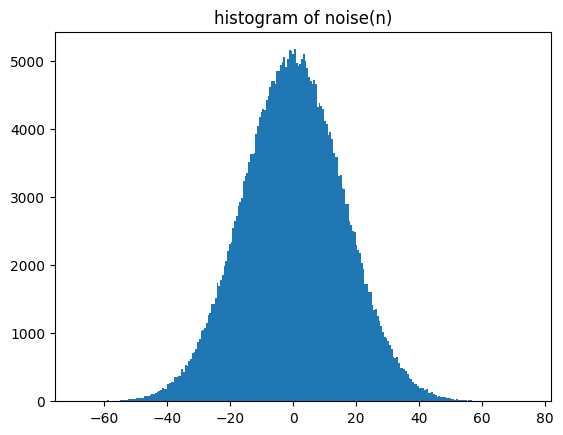

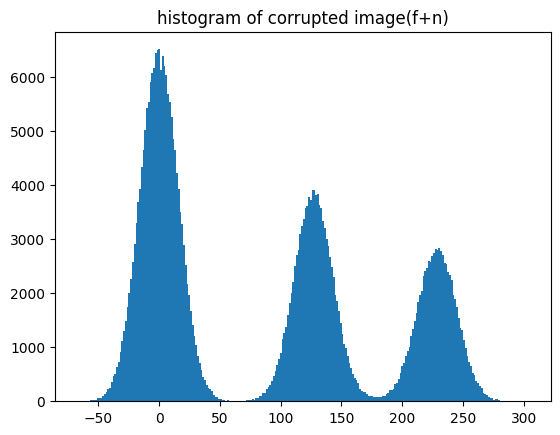

In [6]:

plt.hist(f.ravel(),256)
plt.title('histogram of original image(f)')
plt.show()
plt.hist(n_gauss.ravel(),256)
plt.title('histogram of noise(n)')
plt.show()
plt.hist(f_n.ravel(),256)
plt.title('histogram of corrupted image(f+n)')
plt.show()

### Salt and Pepper Noise

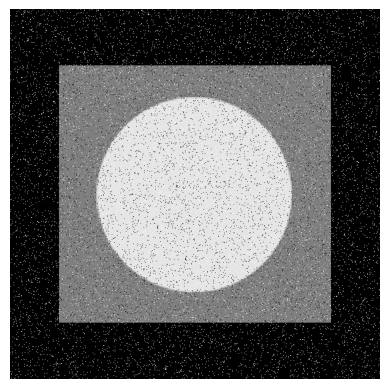

In [7]:
sp = np.random.randint(0,100,np.shape(f))
f_sp = f.copy()
f_sp[sp<3] = 0
f_sp[sp>96] = 255

plt.imshow(f_sp,cmap='gray',aspect='equal')
plt.axis('off')
plt.show()

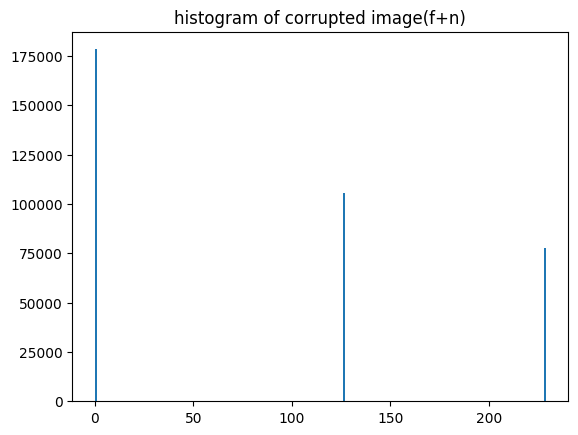

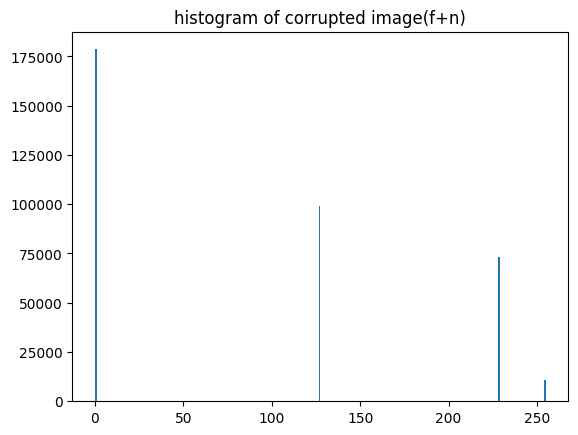

In [8]:
plt.hist(f.ravel(),256)
plt.title('histogram of corrupted image(f+n)')
plt.show()

plt.hist(f_sp.ravel(),256)
plt.title('histogram of corrupted image(f+n)')
plt.show()

### Mean vs Median Filtering

In [9]:
SS = 5 # kernel size (square kernel)
ss = int((SS-1)/2)
r_median = np.zeros(np.shape(f_sp))
r_mean = np.zeros(np.shape(f_sp))

In [10]:
for x in range(ss,np.size(f_sp,0)-ss):
  for y in range(ss,np.size(f_sp,1)-ss):
    Sxy = f_sp[x-ss:x-ss+SS,y-ss:y-ss+SS]
    r_mean[x,y] = np.mean(Sxy)
    r_median[x,y] = np.median(Sxy)

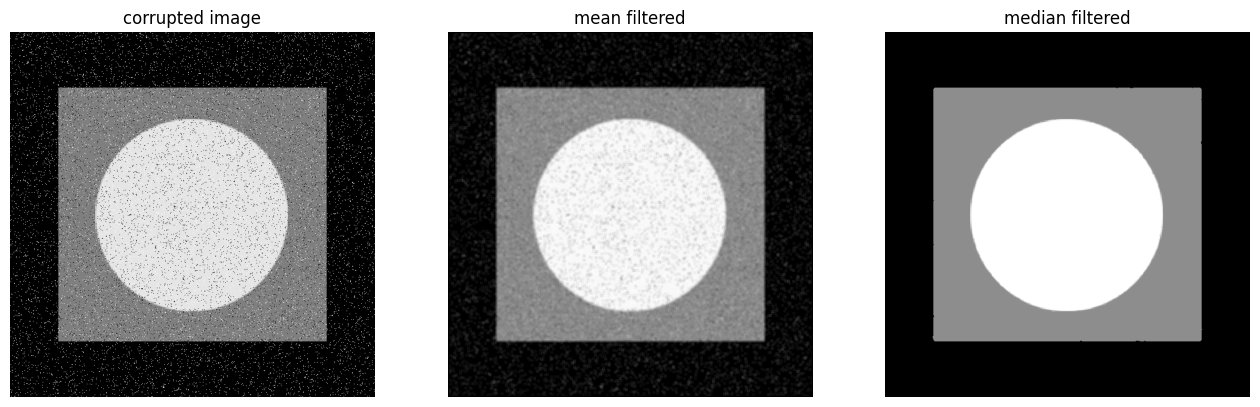

In [11]:
plt.figure(figsize=(16,9))
plt.subplot(131)
plt.imshow(f_sp,cmap='gray',aspect='equal')
plt.axis('off')
plt.title('corrupted image')
plt.subplot(132)
plt.imshow(r_mean,cmap='gray',aspect='equal')
plt.axis('off')
plt.title('mean filtered')
plt.subplot(133)
plt.imshow(r_median,cmap='gray',aspect='equal')
plt.axis('off')
plt.title('median filtered')
plt.show()

## Adaptive Local Noise Reduction

In [12]:
# Adaptive local noise reduction
SS = 5
ss = int((SS-1)/2)
std_eta = 16
r_amean = np.zeros(np.shape(f_sp))
for x in range(ss,np.size(f_sp,0)-ss):
  for y in range(ss,np.size(f_sp,1)-ss):
    Sxy = f_n[x-ss:x-ss+SS,y-ss:y-ss+SS]
    r_mean[x,y] = np.mean(Sxy)
    std_Sxy = np.std(Sxy)
    if std_eta<=std_Sxy:
      r_amean[x,y]=f_sp[x,y]-((std_eta*std_eta)/(std_Sxy*std_Sxy))*(f_sp[x,y]-np.mean(Sxy))
    else:
      r_amean[x,y]=np.mean(Sxy)

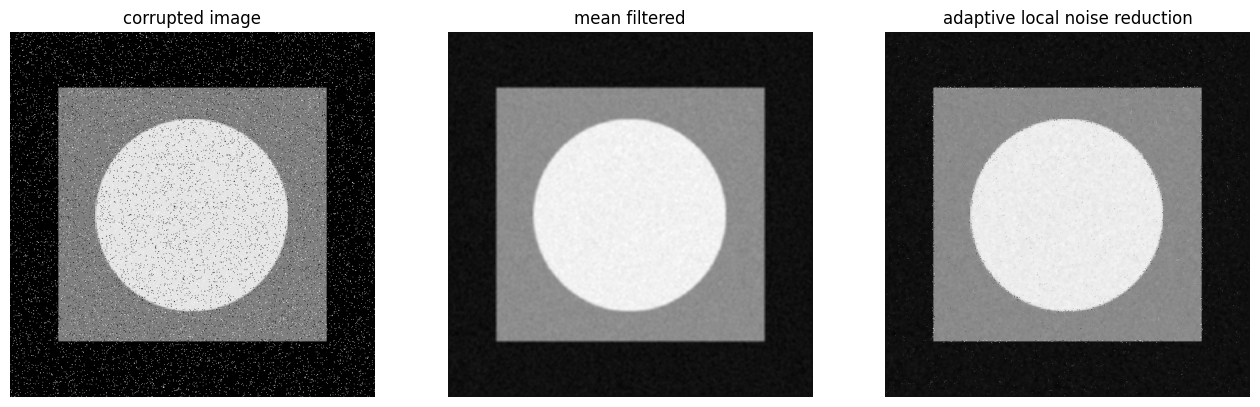

In [13]:
plt.figure(figsize=(16,9))
plt.subplot(131)
plt.imshow(f_sp,cmap='gray',aspect='equal')
plt.axis('off')
plt.title('corrupted image')
plt.subplot(132)
plt.imshow(r_mean,cmap='gray',aspect='equal')
plt.axis('off')
plt.title('mean filtered')
plt.subplot(133)
plt.imshow(r_amean,cmap='gray',aspect='equal')
plt.axis('off')
plt.title('adaptive local noise reduction')
plt.show()